In [1]:
#Général
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#Réduction des dimensions
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("df.csv",sep=";")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,53.1000
4,5,0,3,"Allen, Mr. William Henry",1,35.0,8.0500


# Statistiques descriptives

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,0.649044,29.642093,32.096681
std,256.998173,0.486260,0.834700,0.477538,12.968346,49.697504
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000
25%,224.000000,0.000000,2.000000,0.000000,22.000000,7.895800
50%,446.000000,0.000000,3.000000,1.000000,29.642093,14.454200
75%,668.000000,1.000000,3.000000,1.000000,35.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,512.329200


In [4]:
df['Survived'].unique()

array([0, 1], dtype=int64)

([<matplotlib.patches.Wedge at 0x23a243a5340>,
 [Text(-0.3970459950615895, 1.0258433008045393, '0'),
  Text(0.3970459950615891, -1.0258433008045393, '1')])

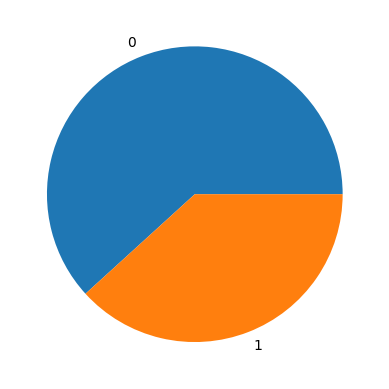

In [5]:
plt.pie(df['Survived'].value_counts(), labels=df['Survived'].unique())

<BarContainer object of 3 artists>

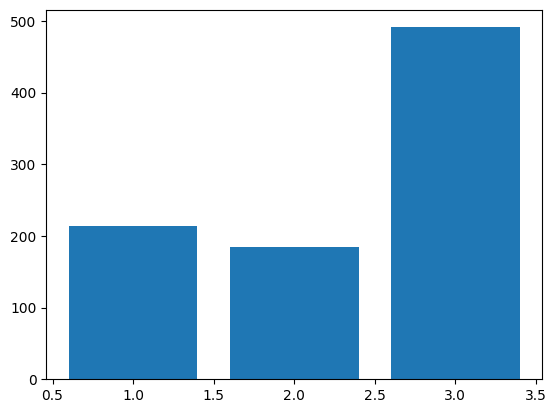

In [6]:
plt.bar(x=df['Pclass'].value_counts().index, height=df['Pclass'].value_counts())

<BarContainer object of 2 artists>

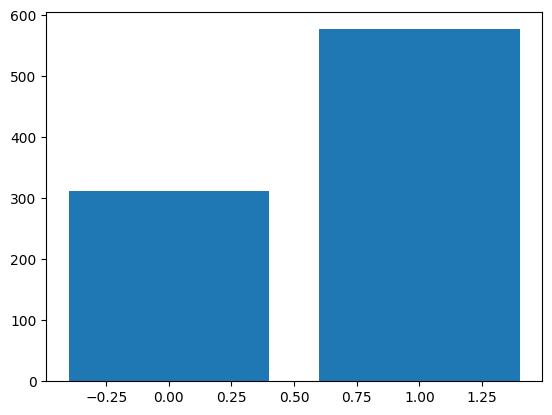

In [7]:
plt.bar(x=df['Sex'].value_counts().index, height=df['Sex'].value_counts())

# EDA

## Analyse univariée

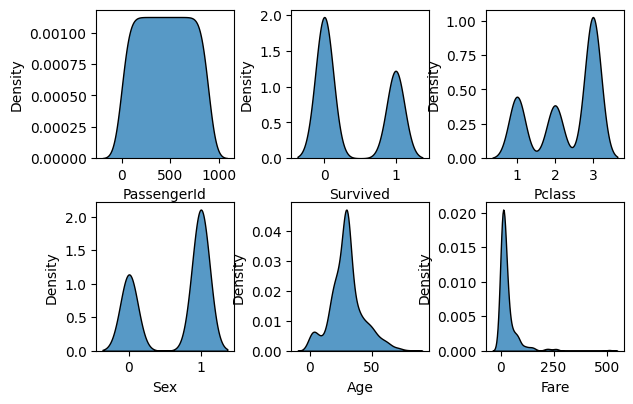

In [8]:
# Les distributions
data_numerical = df.select_dtypes(include=['number'])
fig, axes = plt.subplots(2, 3, figsize=(4,4))
plt.tight_layout(rect=(0, 0, 1.5, 1))
for i, col in enumerate(data_numerical.columns):
    r, c = divmod(i, 3) #le nb est le nombre de colonnes du subplots
    sns.kdeplot(data=data_numerical, x=col,multiple="stack", ax = axes[r,c])

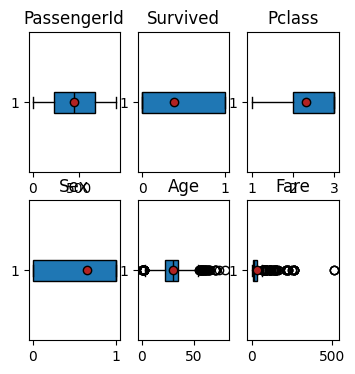

In [9]:
## Boxplots
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

data_numerical = df.select_dtypes(include=['number'])
# nb_row x nb_col >= data_numerical.shape[1]
nb_row = 2
nb_col = 3
fig, axes = plt.subplots(nb_row, nb_col, figsize=(4,4))

for i, col in enumerate(data_numerical.columns):
    r, c = divmod(i, nb_col)
    axes[r, c].boxplot(data_numerical[col], showfliers=True, medianprops=medianprops, 
                       vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
    axes[r, c].set_title(col)

In [10]:
# Suppression de l'outlier Fare = 500 => l'ACP est très sensible aux valeurs abérrantes
df_final = df.loc[df['Fare']<500]

## Analyse bivariée

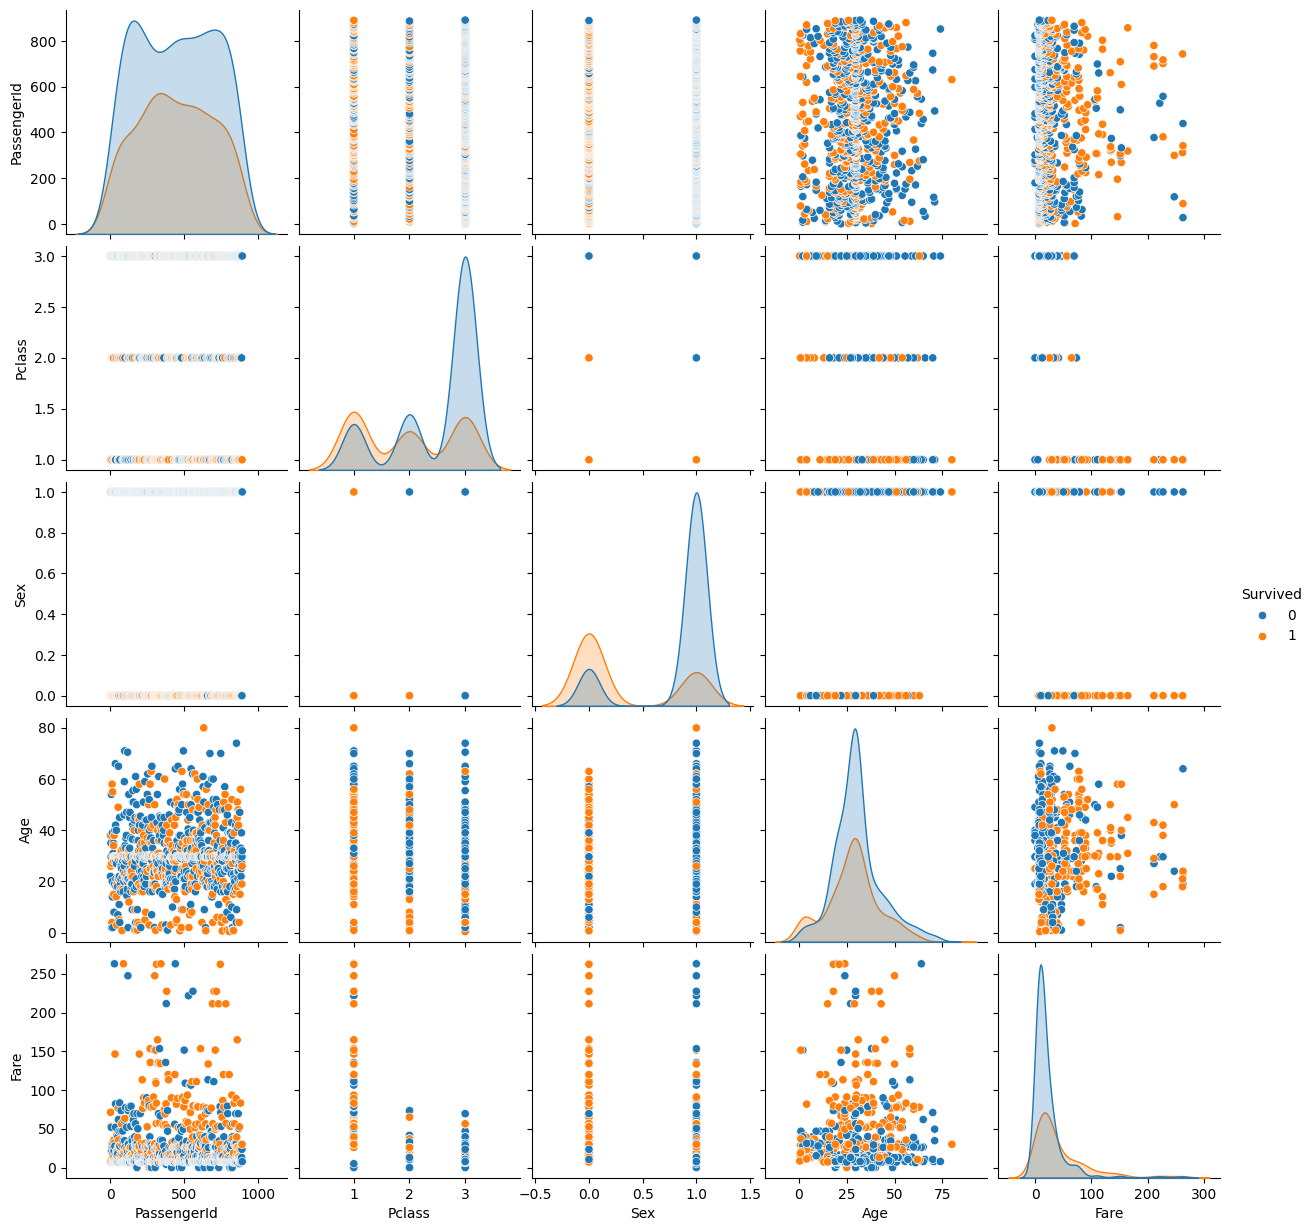

In [11]:
sns.pairplot(df_final.select_dtypes(include=['number']),hue='Survived')

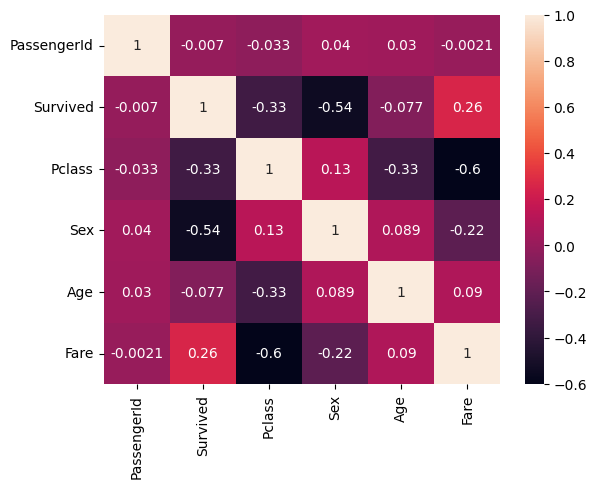

In [12]:
## Matrice de corrélation
corr_matrix = df_final.iloc[:,0:10].corr()

sns.heatmap(corr_matrix, annot=True)
plt.show()

# Principal Component Analysis

In [13]:
# On commence par normaliser les données 
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_final.loc[:,['Pclass','Sex','Age','Fare']])
df_scaled = pd.DataFrame(df_scaled, columns=['Pclass','Sex','Age','Fare'])
df_scaled

,Pclass,Sex,Age,Fare
0,0.821948,0.735438,-0.587333,-0.564532
1,-1.581503,-1.359733,0.645455,0.992225
2,0.821948,-1.359733,-0.279136,-0.548122
3,-1.581503,-1.359733,0.414308,0.550159
4,0.821948,0.735438,0.414308,-0.545083
...,...,...,...,...
881,-0.379778,0.735438,-0.202087,-0.424740
882,-1.581503,-1.359733,-0.818481,-0.011441
883,0.821948,-1.359733,0.001485,-0.170683
884,-1.581503,0.735438,-0.279136,-0.011441


In [14]:
# On va rajouter les labels et exporter les données - Rm en passant : PassengerId a disparu mais ça n'a pas d'impact pour la suite de l'analyse
df_scaled['Survived'] = df.loc[df['Fare']<500,'Survived']
df_scaled

,Pclass,Sex,Age,Fare,Survived
0,0.821948,0.735438,-0.587333,-0.564532,0.0
1,-1.581503,-1.359733,0.645455,0.992225,1.0
2,0.821948,-1.359733,-0.279136,-0.548122,1.0
3,-1.581503,-1.359733,0.414308,0.550159,1.0
4,0.821948,0.735438,0.414308,-0.545083,0.0
...,...,...,...,...,...
881,-0.379778,0.735438,-0.202087,-0.424740,0.0
882,-1.581503,-1.359733,-0.818481,-0.011441,0.0
883,0.821948,-1.359733,0.001485,-0.170683,0.0
884,-1.581503,0.735438,-0.279136,-0.011441,0.0


In [15]:
X_scaled = df_scaled.iloc[:,:-1]
X_scaled

,Pclass,Sex,Age,Fare
0,0.821948,0.735438,-0.587333,-0.564532
1,-1.581503,-1.359733,0.645455,0.992225
2,0.821948,-1.359733,-0.279136,-0.548122
3,-1.581503,-1.359733,0.414308,0.550159
4,0.821948,0.735438,0.414308,-0.545083
...,...,...,...,...
881,-0.379778,0.735438,-0.202087,-0.424740
882,-1.581503,-1.359733,-0.818481,-0.011441
883,0.821948,-1.359733,0.001485,-0.170683
884,-1.581503,0.735438,-0.279136,-0.011441


In [16]:
%%time
#On applique l'ACP aux données scalées :
#On normalise les données
pca = PCA(n_components=4)
X_trans_scaled=pca.fit_transform(X_scaled)

CPU times: total: 31.2 ms
Wall time: 26.3 ms


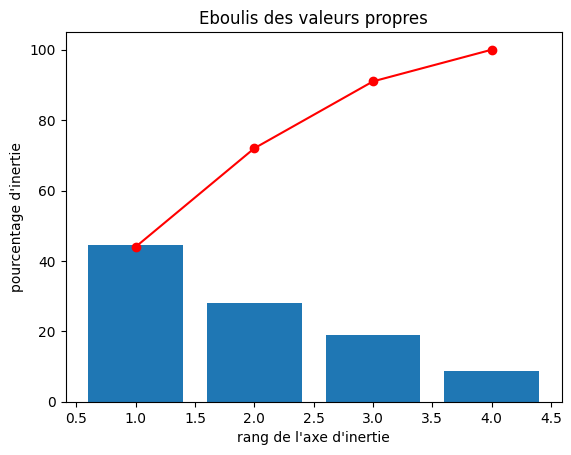

CPU times: total: 203 ms
Wall time: 243 ms


In [17]:
%%time
# Visualisation de l'éboulis des valeurs propres
n_components=4

scree = (pca.explained_variance_ratio_*100).round(2)

scree_cum = scree.cumsum().round()

x_list = range(1, n_components+1)
list(x_list)
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [18]:
#La matrice de corrélation ACP
pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs.columns = X_scaled.columns
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2).T

,F1,F2,F3,F4
Pclass,-0.66,-0.12,-0.17,0.72
Sex,-0.25,0.70,0.66,0.04
Age,0.32,0.67,-0.61,0.27
Fare,0.63,-0.19,0.40,0.64


CPU times: total: 109 ms
Wall time: 129 ms


<Axes: >

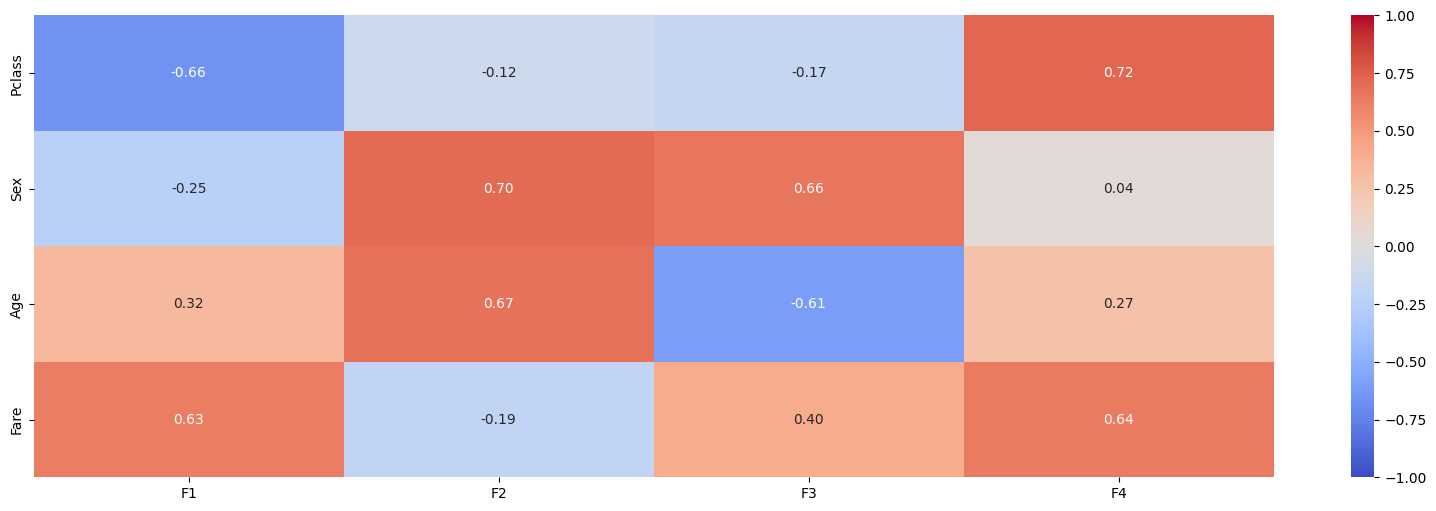

In [19]:
%%time
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

In [20]:
# La fonction de traçage du cercle de corrélation
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

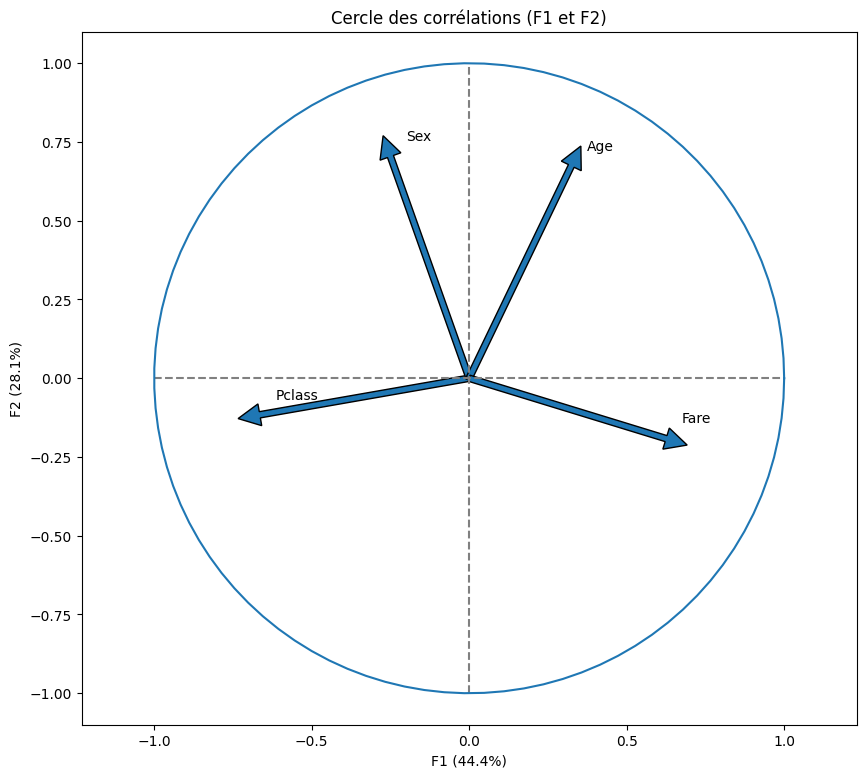

In [21]:
#le cercle de corrélation sur F1-F2
correlation_graph(pca, (0,1), X_scaled.columns)

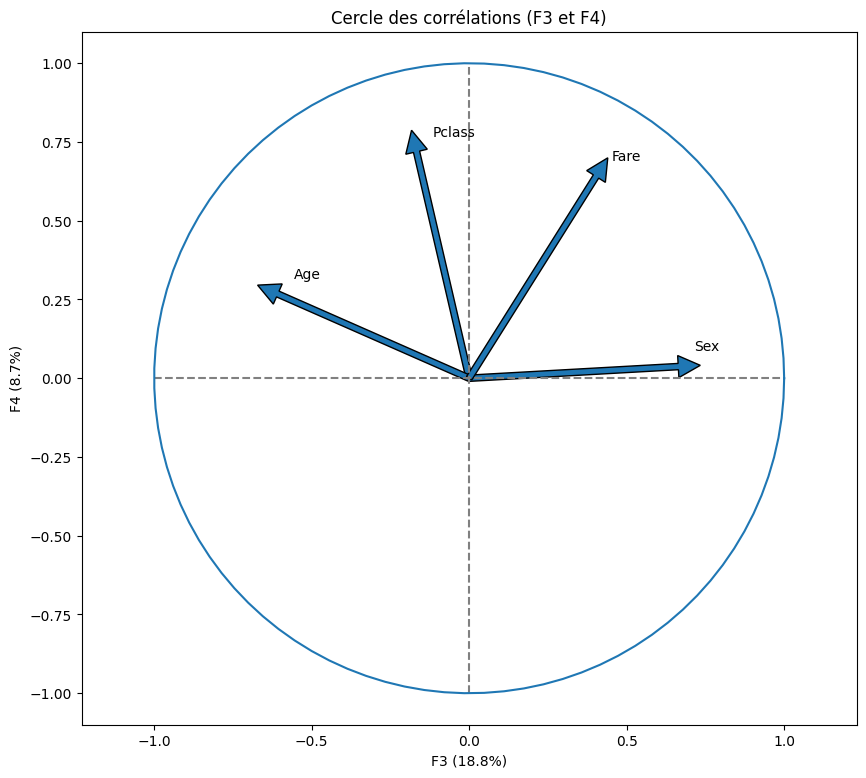

In [22]:
#le cercle de corrélation sur F3-F4
correlation_graph(pca, (2,3), X_scaled.columns)

In [23]:
#La fonction pour tracer les points sur le plan factoriel
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    plt.scatter(   X_[:, x], 
                        X_[:, y], 
                        alpha=alpha, 
                        c=c, 
                        cmap="Set1", 
                        marker=marker)
    #plt.legend(clusters, bbox_to_anchor=(1,1.02))

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

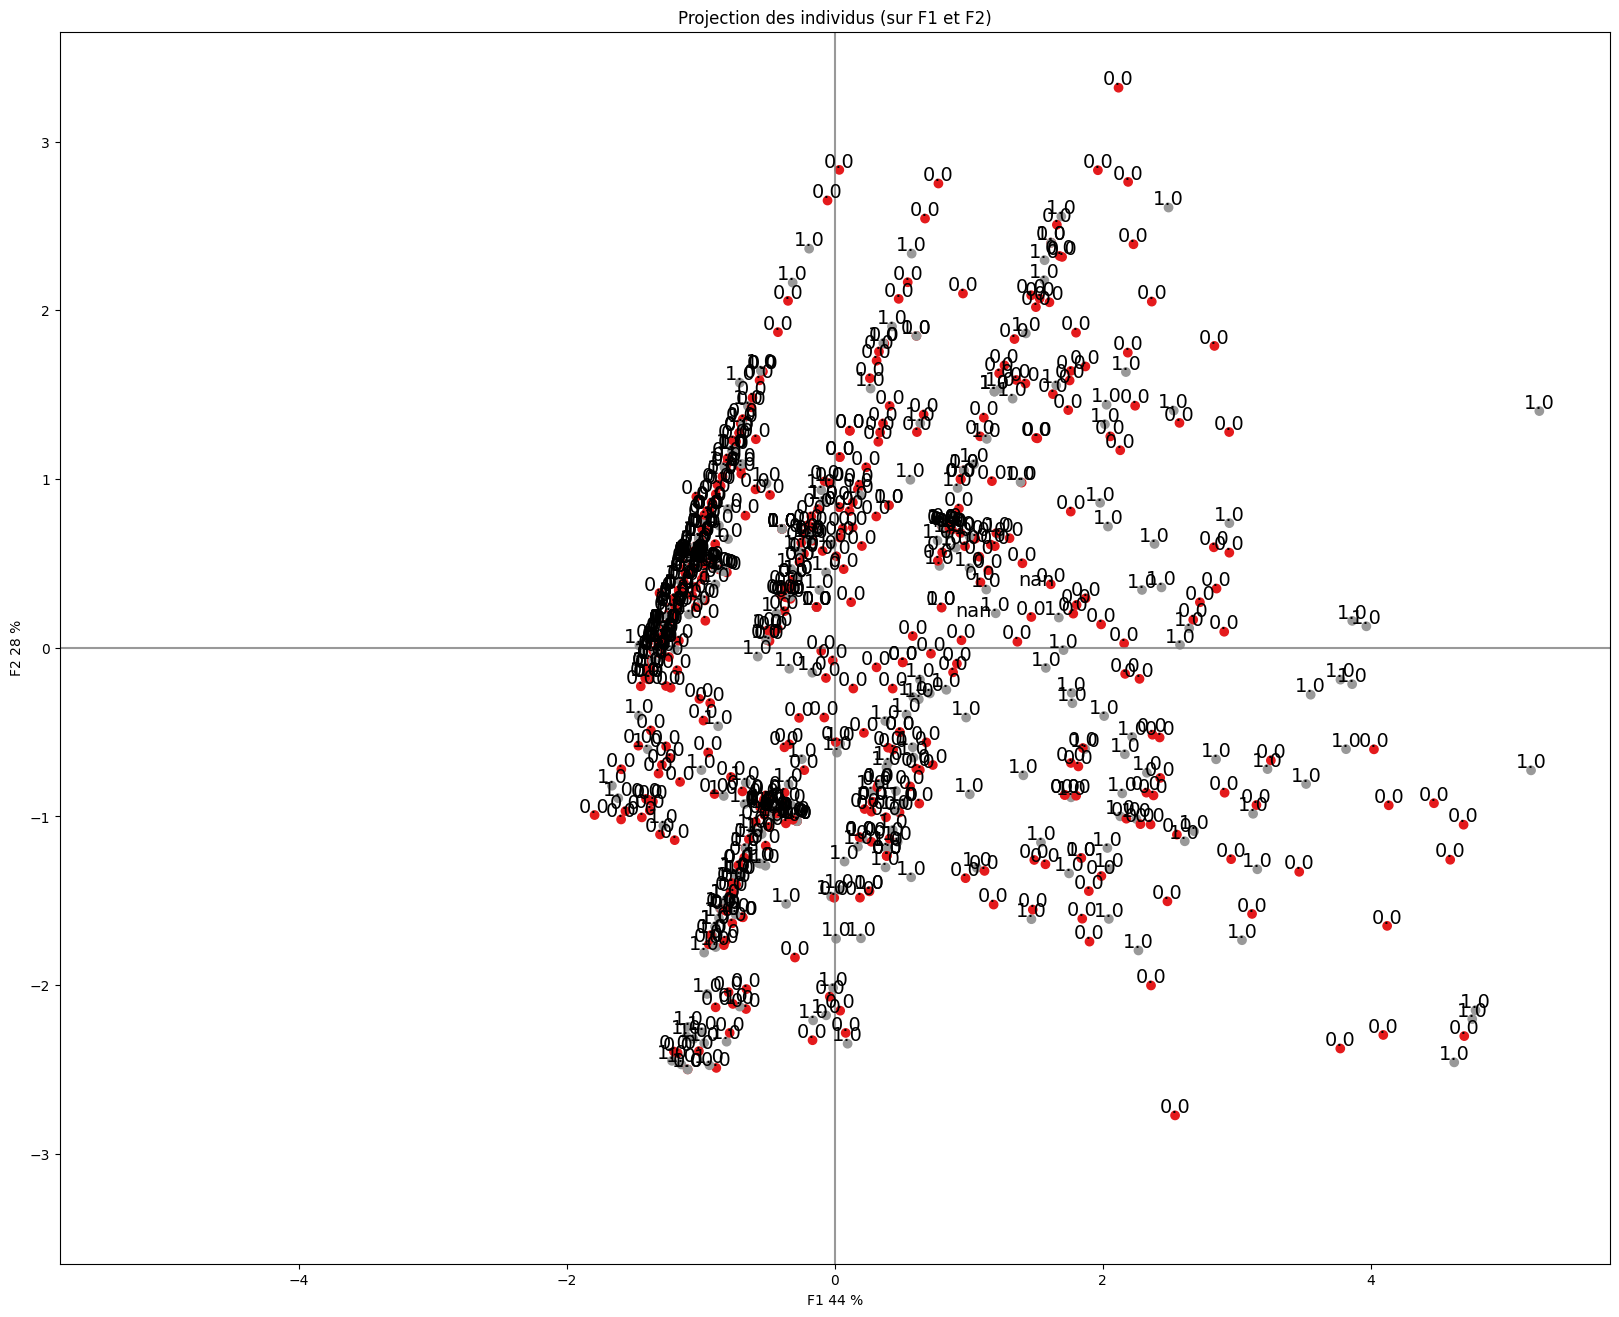

In [24]:
# Visualisation des points sur le plan factoriel F1-F2
X_proj = pca.transform(X_scaled)
x_y = [0,1]
names=df_scaled.index
display_factorial_planes(X_proj, x_y, pca, labels=list(df_scaled['Survived']),clusters=list(df_scaled['Survived']), figsize=(20,16), marker="o")

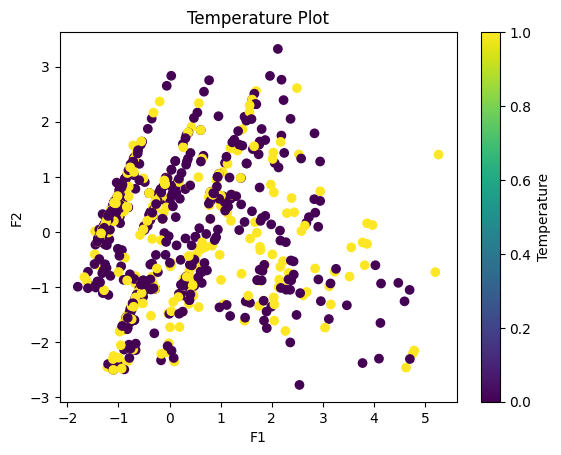

In [25]:
# Représentation des points sur le plan factoriel F1-F2 colorisés en fonction de 'payment_installments' ou 'review_score'

# Charger les données
data = np.array(X_proj)

# Extraire les colonnes pour les facteurs X et Y
X = data[:,0]
Y = data[:,1]

# Extraire la colonne des températures
temperatures = df_scaled.select_dtypes(exclude='object').Survived

# Définir la palette de couleur à utiliser
cmap = plt.get_cmap("viridis")

# Tracer les points sur un plan factoriel et les colorier en fonction des températures
sc = plt.scatter(X, Y, c=temperatures, cmap=cmap, vmin=0, vmax=1)

# Ajouter une barre de couleur pour montrer la correspondance des couleurs aux températures
cbar = plt.colorbar(sc)
cbar.set_label("Temperature")

# Ajouter une légende et des titres
plt.xlabel("F1")
plt.ylabel("F2")
plt.title("Temperature Plot")

# Afficher le plot
plt.show()

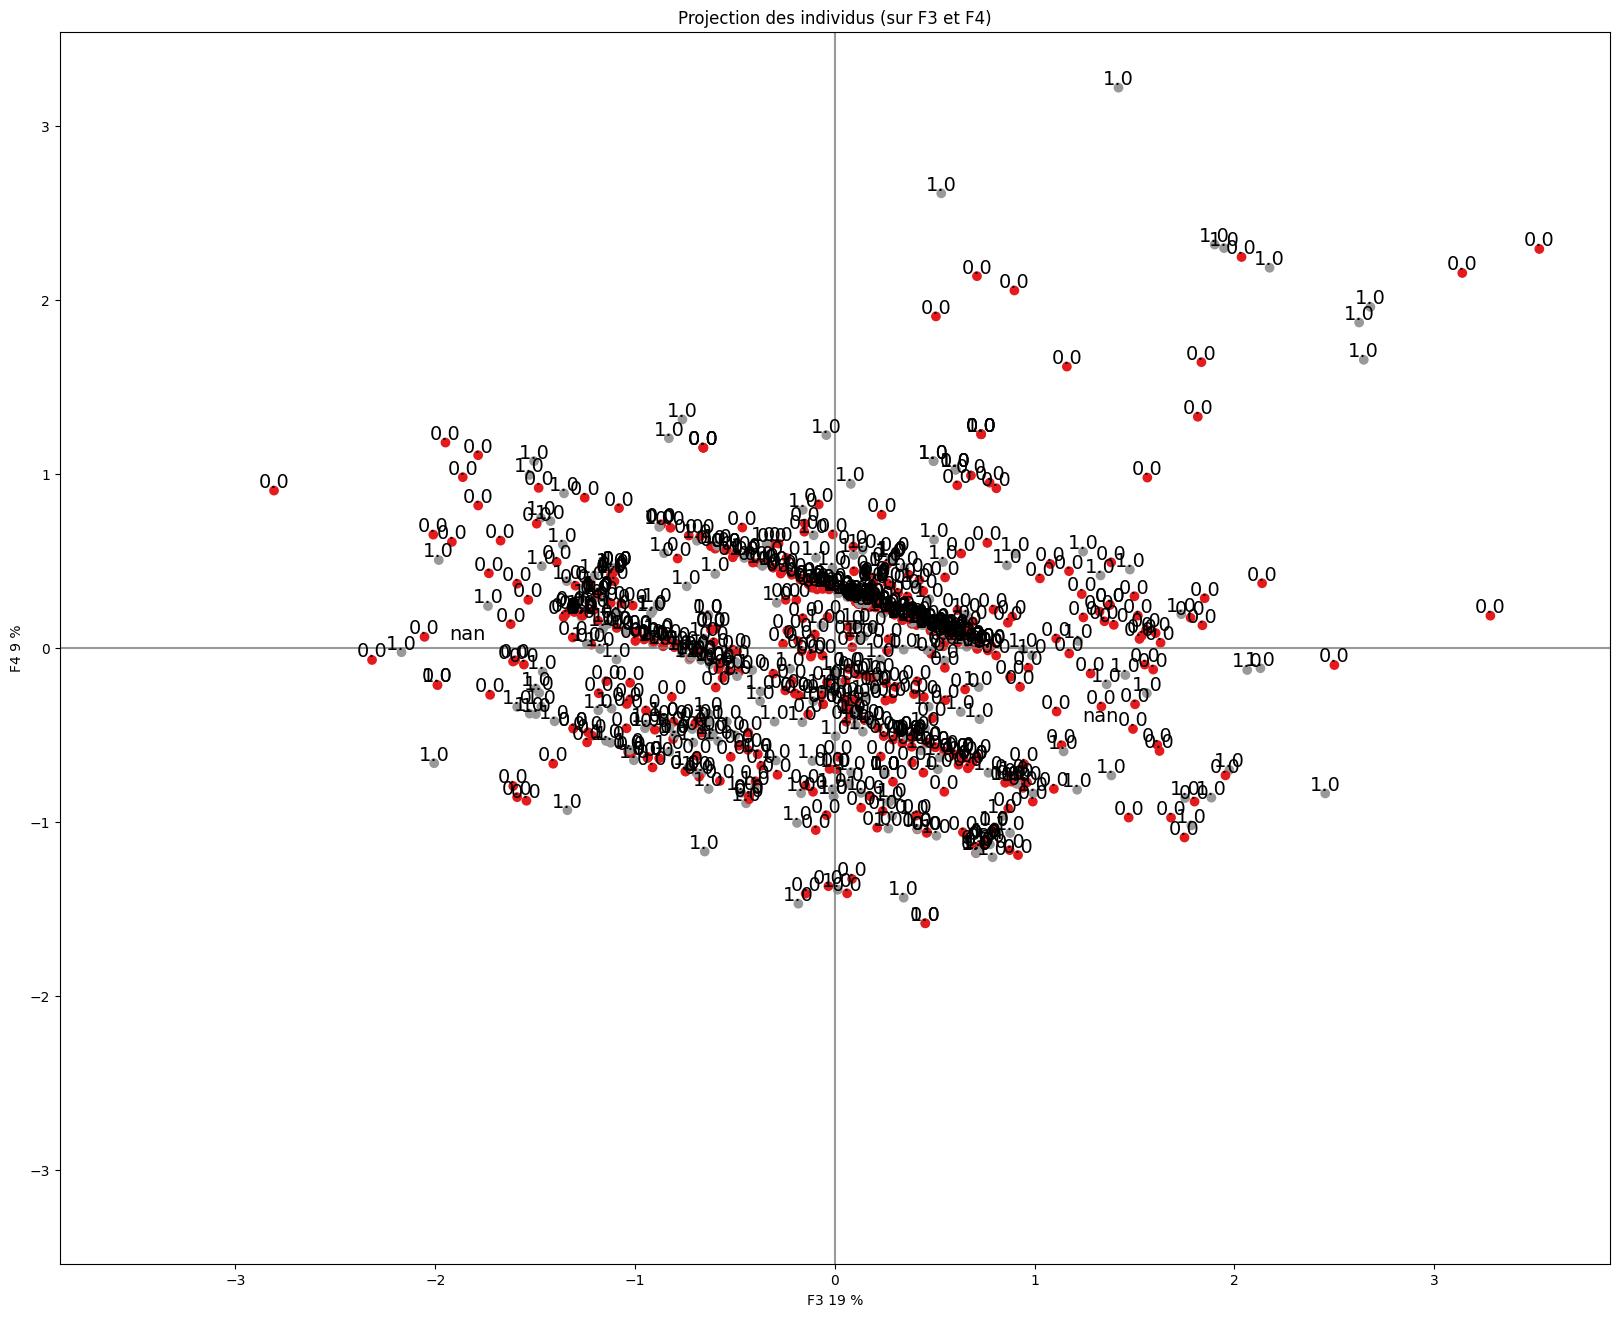

In [26]:
# Visualisation des points sur le plan factoriel F2-F3
x_y = [2,3]
names=X_scaled.index
display_factorial_planes(X_proj, x_y, pca, labels=list(df_scaled['Survived']), clusters=list(df_scaled['Survived']),figsize=(20,16), marker="o")

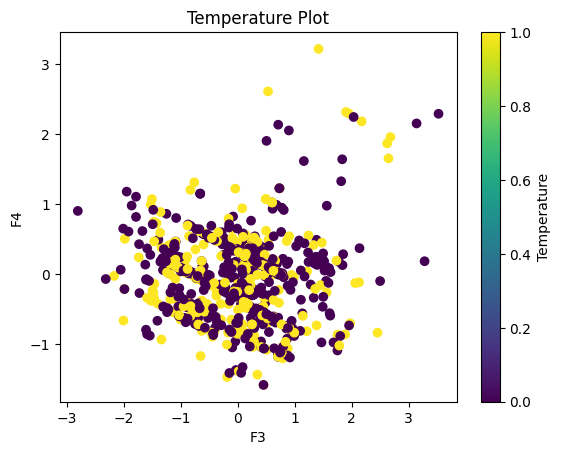

In [27]:
# Représentation des points sur le plan factoriel F1-F2 colorisés en fonction de 'payment_installments' ou 'review_score'

# Charger les données
data = np.array(X_proj)

# Extraire les colonnes pour les facteurs X et Y
X = data[:,2]
Y = data[:,3]

# Extraire la colonne des températures
temperatures = df_scaled.select_dtypes(exclude='object').Survived

# Définir la palette de couleur à utiliser
cmap = plt.get_cmap("viridis")

# Tracer les points sur un plan factoriel et les colorier en fonction des températures
sc = plt.scatter(X, Y, c=temperatures, cmap=cmap, vmin=0, vmax=1)

# Ajouter une barre de couleur pour montrer la correspondance des couleurs aux températures
cbar = plt.colorbar(sc)
cbar.set_label("Temperature")

# Ajouter une légende et des titres
plt.xlabel("F3")
plt.ylabel("F4")
plt.title("Temperature Plot")

# Afficher le plot
plt.show()